# 데이터 정리

## 데이터 입력
먼저 데이터를 불러옵니다.

In [1]:
import pandas as pd
data = pd.read_excel("./데이터/제공데이터.xlsx")
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data

홍수사상번호       연    월     일    시간         유입량 데이터집단 1 Unnamed: 7  \
0        NaN     NaN  NaN   NaN   NaN         NaN  유역평균강수    강우(A지역)   
1        1.0  2006.0  7.0  10.0   8.0  189.100000     6.4          7   
2        1.0  2006.0  7.0  10.0   9.0  216.951962     6.3          7   
3        1.0  2006.0  7.0  10.0  10.0  251.424419     6.4          7   
4        1.0  2006.0  7.0  10.0  11.0  302.812199     7.3          7   
...      ...     ...  ...   ...   ...         ...     ...        ...   
3047    26.0  2018.0  7.0   7.0  17.0         NaN  2.3689          1   
3048    26.0  2018.0  7.0   7.0  18.0         NaN  2.3689          1   
3049    26.0  2018.0  7.0   7.0  19.0         NaN  2.3689          1   
3050    26.0  2018.0  7.0   7.0  20.0         NaN  2.3689          1   
3051    26.0  2018.0  7.0   7.0  21.0         NaN  2.3689          1   

     Unnamed: 8 Unnamed: 9  ... Unnamed: 38 Unnamed: 39 Unnamed: 40 데이터 집단 6  \
0       강우(B지역)    강우(C지역)  ...     강우(D지역)     수위(E지역)     수위(D지역)   유역평균강수   
1             7          7  ...           8        2.54      122.66      6.4   
2             8          7  ...          10        2.53     122.648      7.3   
3             9          7  ...          11        2.53     122.636      8.2   
4            10          7  ...          14        2.53      122.62     11.3   
...         ...        ...  ...         ...         ...         ...      ...   
3047          0          0  ...           0        3.16     129.916   2.1722   
3048          0          0  ...           0        3.15     129.928   2.0805   
3049          0          0  ...           0        3.13      129.94   2.0354   
3050          0          0  ...           0        3.11     129.952   1.8993   
3051          0          0  ...           0         3.1     129.964    1.881   

     Unnamed: 42 Unnamed: 43 Unnamed: 44 Unnamed: 45 Unnamed: 46 Unnamed: 47  
0        강우(A지역)     강우(B지역)     강우(C지역)     강우(D지역)     수위(E지역)     수위(D지역)  
1              7           7           8           8        2.54      122.61  
2              7           8          10          10        2.53       122.6  
3              7           9          10          11        2.53      122.59  
4              9          10          15          14        2.53     122.585  
...          ...         ...         ...         ...         ...         ...  
3047           1           0           0           0        3.16      129.95  
3048           1           0           0           0        3.15      129.97  
3049           1           0           0           0        3.13      129.98  
3050           1           0           0           0        3.11      129.99  
3051           1           0           0           0         3.1         130  

[3052 rows x 48 columns]

## 열이름 정리
데이터를 살펴보니 column명이 정리되지 않았습니다. 이를 정리하기 위해 집단별 feature가 동일하다는 점을 이용해서 정리해줍니다.

In [3]:
names = []
for i in range(6):
    list_temp = data.iloc[0,6+7*i:13+7*i].apply(lambda x: "집단"+str(i+1)+" - "+x).values.tolist() 
    names.append(list_temp)
col_temp = names[0] + names[1] +names[2] + names[3] + names[4] + names[5]

In [4]:
data.columns = data.columns[0:6].tolist() + col_temp  
data.drop(0, inplace=True)

연, 월, 일, 시간의 데이터가 결국 시간을 나타내는 데이터니까 Datetimeindex로 변환해주겠습니다.

In [5]:
data.index = pd.to_datetime(dict(year=data['연'], month=data['월'], day=data['일'], hour=data['시간'])) 

data.drop(['연','월','일','시간'],axis=1,inplace=True)

데이터들이 연산가능한 숫자형이 아닌 문자열로 인식되고 있으니 object가 아닌 float으로 바꿔줘야 합니다.

In [6]:
for x in [var for var in data.columns if data[var].dtype == 'object']:
    data[x] = data[x].astype(float)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3051 entries, 2006-07-10 08:00:00 to 2018-07-07 21:00:00
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   홍수사상번호         3051 non-null   float64
 1   유입량            2891 non-null   float64
 2   집단1 - 유역평균강수   3051 non-null   float64
 3   집단1 - 강우(A지역)  3051 non-null   float64
 4   집단1 - 강우(B지역)  3051 non-null   float64
 5   집단1 - 강우(C지역)  3051 non-null   float64
 6   집단1 - 강우(D지역)  3051 non-null   float64
 7   집단1 - 수위(E지역)  3051 non-null   float64
 8   집단1 - 수위(D지역)  3051 non-null   float64
 9   집단2 - 유역평균강수   3051 non-null   float64
 10  집단2 - 강우(A지역)  3051 non-null   float64
 11  집단2 - 강우(B지역)  3051 non-null   float64
 12  집단2 - 강우(C지역)  3051 non-null   float64
 13  집단2 - 강우(D지역)  3051 non-null   float64
 14  집단2 - 수위(E지역)  3051 non-null   float64
 15  집단2 - 수위(D지역)  3051 non-null   float64
 16  집단3 - 유역평균강수   3051 non-null   float64
 17  집단3 - 강우(A지역)  3

# 전처리

## 유역평균강수량

가장 먼저 유역평균강수량이란 feature가 담고 있는 의미에 대해 생각해보겠습니다.
우선 기간이 항상 여름철로 비가 주된 강수량 공급원이 없음을 고려한다면 강수량으로 생각할 수 있을 것입니다.
제공된 설명에 의하면 한 집단의 유역에는 5개의 지역이 있으므로 유역평균강수량은 A부터 D까지 제시된 강우량을 통해 E지역 강우량을 구하는데 사용할 수 있습니다.

In [8]:
for i in range(1,7):
    data['집단'+str(i)+" - "+"강우(E지역)"] = data['집단'+str(i)+" - "+"유역평균강수"]*5 - (data['집단'+str(i)+" - "+"강우(A지역)"]+data['집단'+str(i)+" - "+"강우(B지역)"]+data['집단'+str(i)+" - "+"강우(C지역)"]+data['집단'+str(i)+" - "+"강우(D지역)"])
    data.drop(['집단'+str(i)+" - "+"유역평균강수"],axis=1, inplace=True)    

## 유역집단

데이터의 구조를 파악한 결과 유역집단이 6개나 있지만 각각 어떤 점에서 다른지에 대해 무지합니다.
이에 대한 분석을 하기 위해 집단별 동일 feature끼리 상관분석을 진행해보았습니다.

<AxesSubplot:>

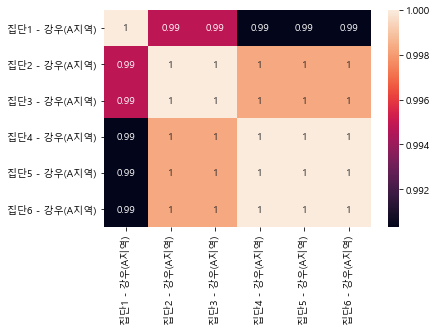

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
temp = data[[i for i in data.columns if ('강우(A지역)' in i)]]
sns.heatmap(temp.corr(), annot=True)

집단별 유의미한 차이를 보여주지 못하고 상관관계가 지나치게 높으니 평균값으로 대체해주겠습니다.

In [10]:
fe_name= ['강우(A지역)','강우(B지역)','강우(C지역)','강우(D지역)','강우(E지역)','수위(D지역)','수위(E지역)']
for name in fe_name:
    fe_data = data[[i for i in data.columns if (name in i) ]]
    data.drop([i for i in data.columns if (name in i)],axis=1,inplace=True)
    data[name] = fe_data.mean(axis=1)

## 이상치 분석

홍수사상별 유입량의 규모를 관찰하면 눈에 띄는 이상치들을 볼 수 있습니다.

In [ ]:
import numpy as np

flg=plt.figure(figsize=(9,7))
ax = sns.boxplot(data=data,x='홍수사상번호',y='유입량')

이에 대한 추론을 해보았습니다.
Kwater 홈페이지에 의한 홍수 원인분석에 의하면 
우리나라의 홍수의 주요 원인은 크게 두 가지로 나눌 수 있는데, 하나는 주로 기압이 불안정한 여름철 장마기간에 생기는 집중호우이며, 다른 하나는 7∼9월 한반도를 통과하는 태풍으로 인한 국지성호우(局地性豪雨)등으로 인해 발생합니다.  
엄연히 다른 두 종류의 홍수가 존재하며 이에 따른 유입량의 차이가 유의미하기에 이를 분별하기 위한 변수를 만들어 보겠습니다.
https://www.water.or.kr/disaster/general/flood/info.do?seq=1822&p_group_seq=1821&menu_mode=3

직접적으로 유입량에 대한 데이터를 이용하는 일은 없어야만 하기에 이를 대변할 수 있는 feature를 찾아보겠습니다.

In [ ]:
flg = plt.figure(figsize=(9, 7))
sns.heatmap(data.corr(), cmap='Blues', annot=True)

이상치에 해당하는 홍수사상들을 수식으로 선별합니다.
Kwater의 홍수기록에 의한다면 구하고자하는 26사상은 태풍 쁘라삐룬이 한국에 머물던 기간이었습니다.
이에 의거해 26사상의 값도 태풍에 의한 홍수였다고 판단하겠습니다.
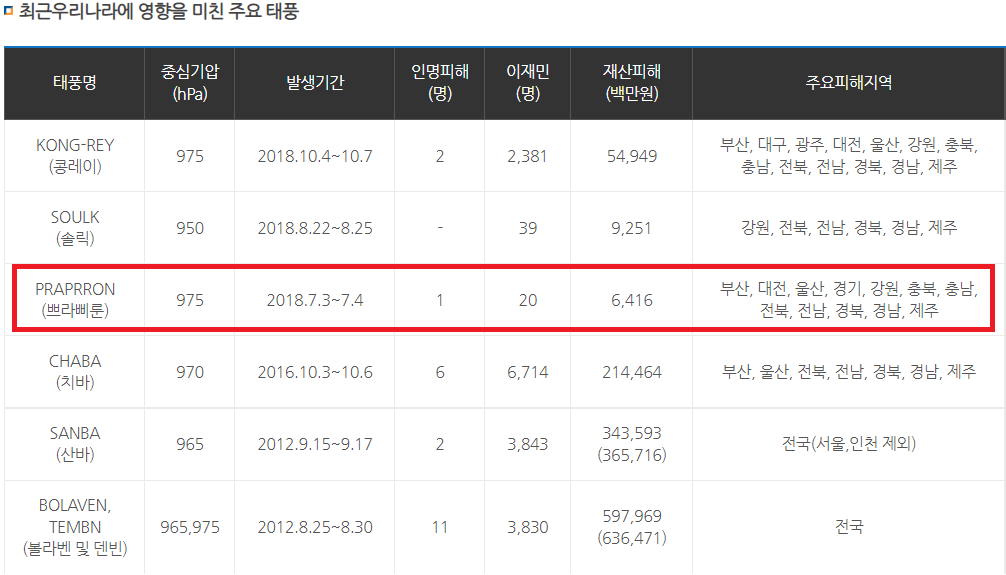
https://www.water.or.kr/disaster/general/flood/flood03_datail04.do?seq=1823&p_group_seq=1821&menu_mode=3

In [ ]:
outlier=[]
for i in range(25):
    data_temp = data.loc[(data['홍수사상번호']==i+1),'수위(E지역)']
    quantile_75 = data_temp.quantile(0.75)
    quantile_25 = data_temp.quantile(0.25)
    iqr = quantile_75 - quantile_25
    if (data_temp.max() > quantile_75 + iqr*1.5) or (data_temp.min() < quantile_25 - iqr*1.5):
        outlier.append(i+1)
outlier.append(26)
print(outlier)

태풍에 의한 홍수에 해당하는지, 아니면 장마에 의한 홍수에 해당하는지를 나타내는 이진 변수를 만들겠습니다.

## 시간 분석

이번 데이터셋이 시간에 따른 유입량의 변화추이 관찰이 중요한데 이에 대한 반영이 부족하다고 생각했습니다.
그러나 ARIMA나 LSTM과 같은 시계열 분석을 진행하기엔 홍수기간만의 단절된 데이터이고, 26사상의 기간동안 주어진 데이터가 없다는 점에서 다른 방식을 모색하게 되었습니다.
이에 매시간 각자의 홍수사상내 지나간 시간을 홍수기간 전체에 대한 비율로 새로운 feature를 경과 퍼센티지란 이름으로 만들었습니다.

경과% = 해당 홍수사상 이후 현재까지 경과한 시간 / 해당 홍수사상의 기간

In [ ]:
temp = data.copy()
flood_index = list()
floodcount = temp.groupby('홍수사상번호').count().max(axis=1).tolist()
floodnum = 0
count = 0
temp['경과%'] = 0
for i in range(0, len(data)):
    if floodnum != temp.iloc[i, 0]:
        floodnum += 1
        flood_index.append(i)
        count = 0
    count += 1
    temp.iloc[i, 9] = count / floodcount[floodnum - 1] * 100
data = temp.copy()

In [ ]:
data

# 모델링

In [ ]:
train = data.loc[data['유입량'].isna()==0]
test = data.loc[data['유입량'].isna()==1]
X_df = train.drop(['유입량'],axis=1)
y_df = train['유입량']
test.drop(['유입량'], axis=1,inplace=True)

## 교차검증

모델의 올바른 학습을 위해선 교차검증이 올바르게 이루어져야 하는데, 시간에 종속적인 데이터셋을 랜덤으로 추출하는 방식은 적합하지 않습니다. 따라서 훈련용 데이터셋이 항상 검증용 데이터셋에 선행하게 만들어 주겠습니다. 구체적으로는 25사상을 5개의 집단으로 나눈뒤 각 집단별 4개의 선행홍수사상을 학습하고 후행홍수사상으로 검증하도록 설계하겠습니다.

In [ ]:
start_indices = [flood_index[i-1] for i in range(1,26) if i%5==1]
stop_indices = [flood_index[i] for i in range(1,26) if i%5==0]
mid_indices = [flood_index[i] for i in range(1,26) if i%5==4]

class FloodSeasonSplit():
    def split(self):
        for i in range(5):
            indices = np.arange(len(X_df))
            start = int(start_indices[i])
            stop = int(stop_indices[i])
            mid = int(mid_indices[i])
            yield indices[start : mid+1], indices[mid : stop+1]
cv = FloodSeasonSplit()

## 모델

우선 트리기반 회귀모델을 먼저 활용해보겠습니다. 그 중 우수한 성과를 낸다고 알려진 RandomForest 모델, XGBoost 모델, LightGBM 모델까지 총 3개의 모델에 대해 진행해보았습니다. 각 모델에 대한 parameter 최적화는 진행했습니다.

In [ ]:
from sklearn .ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor(n_estimators=400,max_depth=7,min_samples_leaf=7,min_samples_split=7)

for train_index, test_index in cv.split(): 
    X_train, X_test = X_df.iloc[train_index], X_df.iloc[test_index]
    y_train, y_test = y_df.iloc[train_index], y_df.iloc[test_index]
    rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_test)
    rf_score = mean_squared_error(y_test,rf_pred)**0.5    
    print('RandomForest rmse score : {0}'.format(rf_score))

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(learning_rate=0.02,n_estimators=400,max_depth=7,colsample_bytree=0.8,subsample=0.8)

for train_index, test_index in cv.split():  
    X_train, X_test = X_df.iloc[train_index], X_df.iloc[test_index]
    y_train, y_test = y_df.iloc[train_index], y_df.iloc[test_index]
    xgb.fit(X_train, y_train)
    xgb_pred = xgb.predict(X_test)
    xgb_score = mean_squared_error(y_test,xgb_pred)**0.5
    print('XGBoost rmse score : {0}'.format(xgb_score))

In [ ]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(learning_rate=0.02,n_estimators=400,max_depth=7,num_leaves=13,colsample_bytree=1,subsample=1)

for train_index, test_index in cv.split():  
    X_train, X_test = X_df.iloc[train_index], X_df.iloc[test_index]
    y_train, y_test = y_df.iloc[train_index], y_df.iloc[test_index]
    lgbm.fit(X_train, y_train)
    lgbm_pred = lgbm.predict(X_test)
    lgbm_score = mean_squared_error(y_test,lgbm_pred)**0.5
    print('LightGBM rmse score : {0}'.format(lgbm_score))

3개의 모델이 우수한 구간이 저마다 다르므로 모두 고려해보겠습니다.

이번엔 규제 선형회귀 방식인 Ridge회귀와 Lasso회귀를 비교해보았습니다. 역시 두 모델 모두 수차례 parameter 최적화를 거쳤습니다.

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=100)

for train_index, test_index in cv.split():  
    X_train, X_test = X_df.iloc[train_index], X_df.iloc[test_index]
    y_train, y_test = y_df.iloc[train_index], y_df.iloc[test_index]
    ridge.fit(X_train, y_train)
    ridge_pred = ridge.predict(X_test)
    ridge_score = mean_squared_error(y_test,ridge_pred)**0.5
    print('Ridge rmse score : {0}'.format(ridge_score))

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=100)

for train_index, test_index in cv.split(): 
    X_train, X_test = X_df.iloc[train_index], X_df.iloc[test_index]
    y_train, y_test = y_df.iloc[train_index], y_df.iloc[test_index]
    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X_test)
    lasso_score = mean_squared_error(y_test,lasso_pred)**0.5
    print('Lasso rmse score : {0}'.format(lasso_score))

결과를 관찰한 결과 두 규제 회귀모델중엔 Lasso 모델이 일관되게 이 데이터셋에 적합한 것으로 드러났습니다.

결과를 해석해본 결과 모든 모델의 초반 데이터의 metric이 일관되게 저조하게 나타납니다. 이는 초반 홍수사상간 유사성이 적어 발생하는 현상이라고 해석할 수 있습니다. 그러나 크게 고민하지 않아도 되는건 결국 최종 예측하는 데이터는 가장 마지막의 데이터이므로 최근값에 가중치를 부여해 해석하는 것이 옳을 것입니다.
또 확인해본 모델별 우수했던 구간이 저마다 다르므로 이를 절충하기 위해 앙상블 모델중 VotingRegressor를 활용하겠습니다.

In [ ]:
from sklearn.ensemble import VotingRegressor

voting = VotingRegressor(estimators=[('RandomForest',rf),('XGBoost',xgb),('LightGBM',lgbm),('Lasso',lasso)])

for train_index, test_index in cv.split():
    X_train, X_test = X_df.iloc[train_index], X_df.iloc[test_index]
    y_train, y_test = y_df.iloc[train_index], y_df.iloc[test_index]
    voting.fit(X_train, y_train)
    voting_pred = voting.predict(X_test)
    voting_score = mean_squared_error(y_test,voting_pred)**0.5
    print('rmse score : {0}'.format(voting_score))

결과를 확인해보면 기존 모델들과 비교해 전 구간 우수한 예측력을 보여주고 있음을 확인할 수 있습니다.

## 최종 예측

최종적으로 예측한 26사상의 유입량을 시간에 따라서 관찰하면 기존의 홍수사상들과 유사해야 합니다.

In [ ]:
fig = plt.figure(figsize=(10,8))
for i in range(25):
    fig.add_subplot(5,5,i+1)
    train['유입량'].iloc[flood_index[i]:flood_index[i+1]].plot()
    plt.tick_params(axis='x',which='both',bottom=False,labelbottom=False) 
    plt.title(i+1)
plt.tight_layout = True

직접 그려보면 매우 유사함을 확인할 수 있습니다.

In [ ]:
voting.fit(X_df,y_df)
pred = voting.predict(test)
pred_df = pd.Series(pred,index=test.index)
pred_df.plot()
plt.title(26)

## 제출

In [ ]:
submit_df = pd.read_excel('./데이터/평가데이터.xlsx')
pred_df.index = submit_df.index.drop(0)
submit_df['유입량'] = pred_df
submit_df.head()

In [ ]:
submit_df.to_excel('./데이터/평가데이터.xlsx')